In [1]:
import networkx as nx

import time
import random
import numpy as np
import pandas as pd

from IPython import display
from IPython.core.display import HTML
import seaborn as sns
import matplotlib.animation as animation
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
%matplotlib notebook

In [29]:
def FCA_2D_init(shape, k):
    
    (m, n) = shape
    G = nx.grid_2d_graph(m, n)
    nx.draw(G)
    s = np.random.randint(k, size=m*n).reshape(shape)
    
    return s

In [30]:
def FCA_2D_iter(s, k):
    
    old_s = s.copy()
    b = (k-1)//2
    shape = (s.shape[0], s.shape[1])
    (m, n) = shape
    G = nx.grid_2d_graph(m, n)
    s = s.reshape(m*n,)
    
    for i in range(G.number_of_nodes()):
        flag = False
        if s[i] > b:
            for j in range(G.number_of_nodes()):
                if s[j] == b and list(G.nodes)[j] in list(G.adj[list(G.nodes)[i]]):
                    flag = True
            if flag:
                s[i] = s[i]
            else:
                s[i] = (s[i]+1)%k
        else:
            s[i] = (s[i]+1)%k
    
    s = s.reshape(shape)

    return s

In [18]:
def animate(frame):
    im.set_data(FCA_2D_iter(s, 4))
    return im,

In [38]:
# s = FCA_2D_init((3,3), 4)
# s
    
print(s)
s.reshape(9,)
#G = nx.grid_2d_graph(3,3)
#list(G.adj[list(G.nodes)[0]])

[[0 3 2]
 [2 0 0]
 [0 2 2]]


array([0, 3, 2, 2, 0, 0, 0, 2, 2])

In [24]:
FCA_2D_iter(s, 4)

array([[2, 1, 1],
       [1, 3, 1],
       [2, 2, 3]])

In [25]:
FCA_2D_iter(s, 4)

array([[2, 2, 2],
       [2, 3, 2],
       [3, 3, 0]])

In [26]:
FCA_2D_iter(s, 4)

array([[3, 3, 3],
       [3, 0, 3],
       [0, 0, 1]])

In [27]:
FCA_2D_iter(s, 4)

array([[0, 0, 0],
       [0, 1, 3],
       [1, 1, 2]])

In [28]:
FCA_2D_iter(s, 4)

array([[1, 1, 1],
       [1, 2, 3],
       [2, 2, 3]])

<IPython.core.display.Javascript object>


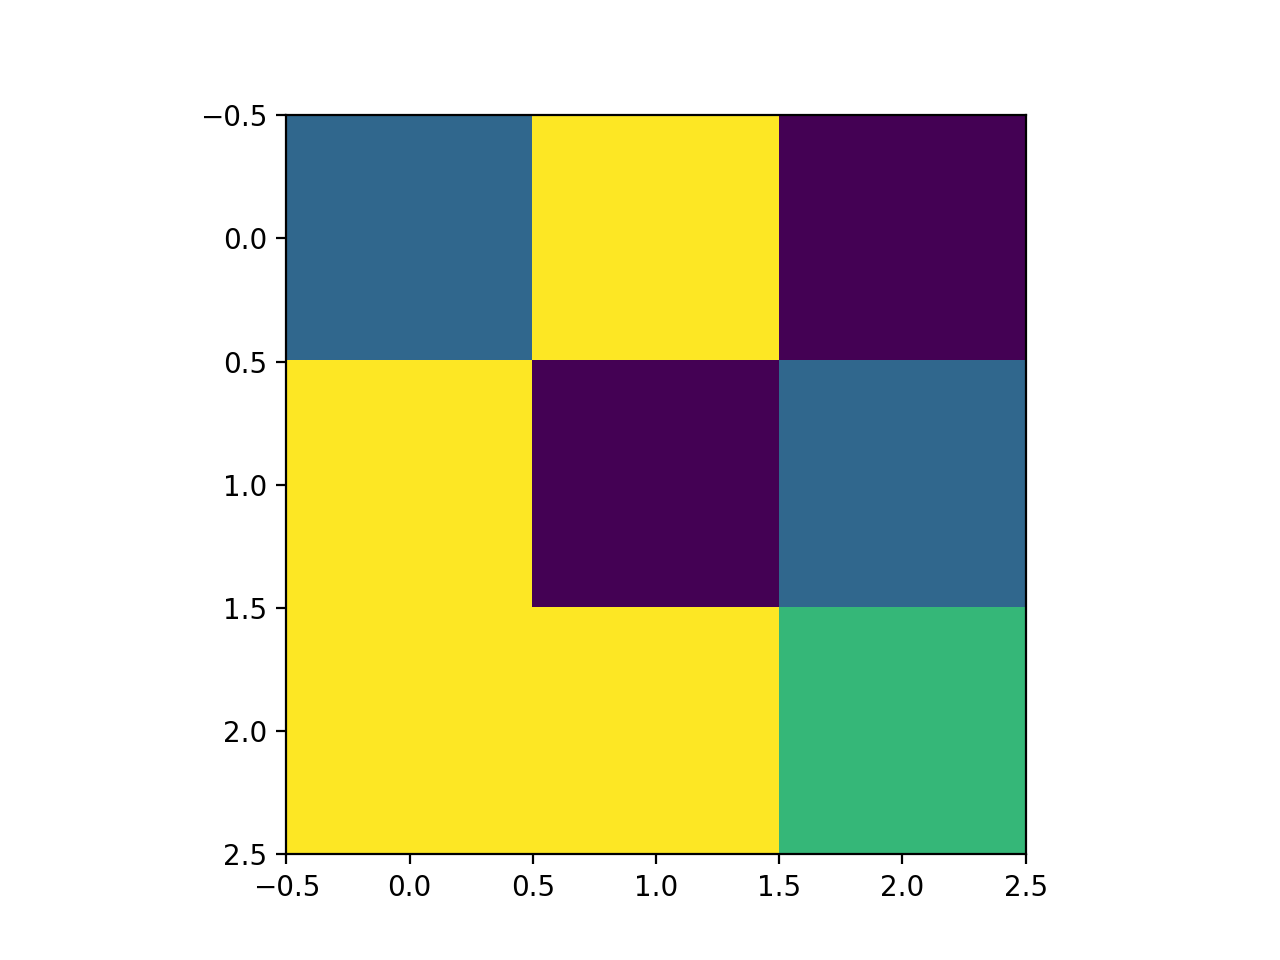

In [21]:
fig = plt.gcf()
im = plt.imshow(s, animated=True)
anim = animation.FuncAnimation(fig, animate, frames=100, interval=100)